## Importing Libraries

In [28]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from scipy import stats
from plotly import express as px
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

today = dt.datetime.today()

## Importing the Tables

In [29]:
df = pd.read_excel('./Files/spread.xlsx', 
                   sheet_name= 'individual',
                   index_col=0).drop([9, 'purchase_price', 'sale_price'], axis=1)

df_month = pd.read_excel('./Files/spread.xlsx', 
                         sheet_name= '2021')

In [30]:
# sorting catagorical values

cat_cols = ['breed']
df = pd.get_dummies(data = df, columns = cat_cols)
df

df

,birth_date,slaughter_date,slaughter_weight,slaughter_age,meds,breed_m,breed_n,breed_t
ID,,,,,,,,
1,2020-11-06,2021-03-14,53.75,128.0,10,0,1,0
2,2021-02-20,2021-06-27,54.00,127.0,10,1,0,0
3,2021-02-20,2021-07-17,56.00,149.0,30,1,0,0
4,2021-05-07,2021-08-31,58.00,114.0,0,0,0,1
5,2021-05-07,2021-09-06,59.00,122.0,0,0,0,1
6,2021-06-21,NaT,NaN,NaN,10,0,1,0
7,2021-06-21,NaT,NaN,NaN,40,0,1,0
8,2021-06-21,NaT,NaN,NaN,10,0,1,0
9,2021-06-21,NaT,NaN,NaN,10,0,1,0


In [31]:
df_alive = df.loc[df.slaughter_date.isnull()==True]
df_alive = df_alive.drop(['slaughter_date', 'slaughter_weight', 'slaughter_age'], axis=1)
#df_alive['slaughter_estimate'] = df.birth_date + dt.timedelta(days=99) 

df_alive

,birth_date,meds,breed_m,breed_n,breed_t
ID,,,,,
6,2021-06-21,10,0,1,0
7,2021-06-21,40,0,1,0
8,2021-06-21,10,0,1,0
9,2021-06-21,10,0,1,0


In [32]:
df_slaughtered = df.loc[df.slaughter_date.isnull()==False]

df_slaughtered

,birth_date,slaughter_date,slaughter_weight,slaughter_age,meds,breed_m,breed_n,breed_t
ID,,,,,,,,
1,2020-11-06,2021-03-14,53.75,128.0,10,0,1,0
2,2021-02-20,2021-06-27,54.00,127.0,10,1,0,0
3,2021-02-20,2021-07-17,56.00,149.0,30,1,0,0
4,2021-05-07,2021-08-31,58.00,114.0,0,0,0,1
5,2021-05-07,2021-09-06,59.00,122.0,0,0,0,1


# Visualization

## Mass - age graph

Text(0.5, 1.0, 'Mass-Age Graph')

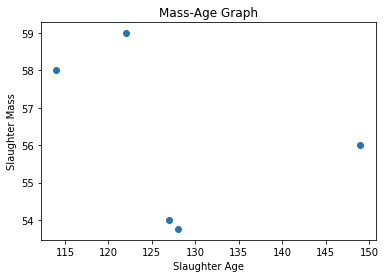

In [33]:
""" px.scatter(x=df_slaughtered.slaughter_age,
        y=df_slaughtered.slaughter_weight,
        title='Mass Against Age',
        labels={'x':'Age(days)', 'y':'Mass(Kg)'}
        ) """

""" df_slaughtered.plot(kind= 'scatter',
        x= 'slaughter_age',
        y= 'slaughter_weight') """

plt.scatter(x=df_slaughtered.slaughter_age,
        y=df_slaughtered.slaughter_weight,
        )
plt.xlabel("Slaughter Age")
plt.ylabel("Slaughter Mass")
plt.title("Mass-Age Graph")

## correlation and them


In [34]:
# correlation of age and mass

np.cov(df_slaughtered.slaughter_age, df_slaughtered.slaughter_weight)[0,1] / (np.std(df.slaughter_weight[:3], ddof=1) * np.std(df.slaughter_age[:3], ddof=1))


-0.7179959683716524

In [35]:
# easier way

r, p = stats.pearsonr(
    df_slaughtered.slaughter_age[:3],
    df_slaughtered.slaughter_weight[:3]
)
corr = df_slaughtered.corr()
r # Pearson correlation coefficient

0.9899641382093992

Text(0.5, 1, 'Correlation Plot')

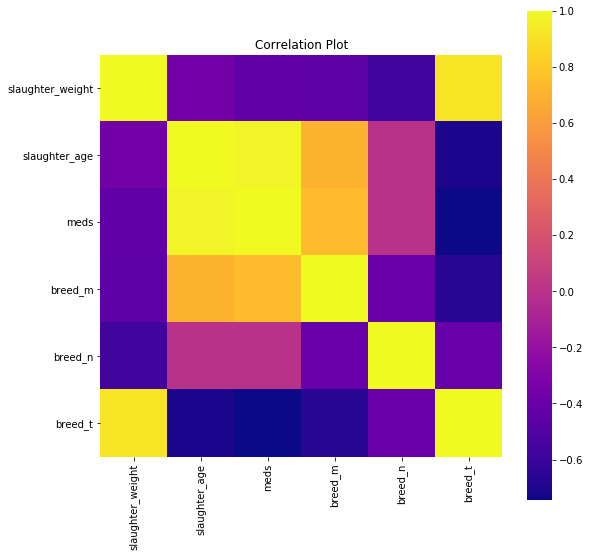

In [36]:
plt.figure(figsize=(9,9))
p = sns.heatmap(corr, square=True, cmap='plasma')
p.set_title('Correlation Plot')

## Line of best fit (regression)

/home/bayanda/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


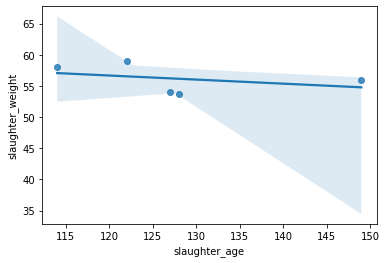

In [37]:
plt = sns.regplot(df_slaughtered.slaughter_age,df_slaughtered.slaughter_weight)

# Models

## decision tree model

In [38]:
from sklearn.tree import DecisionTreeRegressor


# Our target
y = df_slaughtered.slaughter_age

# Our features
features = ['slaughter_weight', 'meds', 'breed_t', 'breed_n', 'breed_m']
X = df_slaughtered[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [39]:
# calling model
age_model = DecisionTreeRegressor(random_state=1)

# fitting data into model
age_model.fit(train_X,train_y)

DecisionTreeRegressor(random_state=1)

In [40]:
# prediction

age_prediction = age_model.predict(val_X)

In [41]:
print('prediction:\n', age_prediction)

print('real:\n',val_y)

prediction:
 [128. 128.]
real:
 ID
3    149.0
2    127.0
Name: slaughter_age, dtype: float64


## random forest

In [42]:
df_slaughtered

,birth_date,slaughter_date,slaughter_weight,slaughter_age,meds,breed_m,breed_n,breed_t
ID,,,,,,,,
1,2020-11-06,2021-03-14,53.75,128.0,10,0,1,0
2,2021-02-20,2021-06-27,54.00,127.0,10,1,0,0
3,2021-02-20,2021-07-17,56.00,149.0,30,1,0,0
4,2021-05-07,2021-08-31,58.00,114.0,0,0,0,1
5,2021-05-07,2021-09-06,59.00,122.0,0,0,0,1


In [43]:
from sklearn.ensemble import RandomForestRegressor


# Our target
y = df_slaughtered.slaughter_age

# Our features
features = ['slaughter_weight', 'meds', 'breed_m', 'breed_n']
X = df_slaughtered[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [44]:
# calling model
rf_age_model = RandomForestRegressor(random_state=1)

# fitting data into model
rf_age_model.fit(train_X, train_y)


RandomForestRegressor(random_state=1)

In [45]:
""" # prediction

rf_age_prediction = age_model.predict(val_X) """

' # prediction\n\nrf_age_prediction = age_model.predict(val_X) '

In [46]:
""" print('prediction:\n', rf_age_prediction)

print('real:\n',val_y) """

" print('prediction:\n', rf_age_prediction)\n\nprint('real:\n',val_y) "

## XGBoost

In [47]:
from xgboost import XGBRegressor

xg_model = XGBRegressor(random_state=1)
xg_model.fit(train_X, train_y)

xg_age_prediction = xg_model.predict(val_X)


print('prediction:\n', xg_age_prediction)

print('real:\n',val_y)


prediction:
 [114.00136 127.99896]
real:
 ID
3    149.0
2    127.0
Name: slaughter_age, dtype: float64


# Average Age

In [48]:
df_alive

,birth_date,meds,breed_m,breed_n,breed_t
ID,,,,,
6,2021-06-21,10,0,1,0
7,2021-06-21,40,0,1,0
8,2021-06-21,10,0,1,0
9,2021-06-21,10,0,1,0


In [49]:
from calendar import monthrange

In [50]:
just = dt.date.today()

day = monthrange(2021, just.month)[1]//2

mid_month = just - dt.timedelta(days=just.day + day)

mid_month

datetime.date(2021, 8, 16)

In [51]:
df_alive['age'] = dt.datetime.fromordinal(just.toordinal()) - pd.to_datetime(df.birth_date)
df_alive['mid_month_age'] = dt.datetime.fromordinal(mid_month.toordinal()) - pd.to_datetime(df.birth_date)

avAge = df_alive.mid_month_age.mean()

df_alive

,birth_date,meds,breed_m,breed_n,breed_t,age,mid_month_age
ID,,,,,,,
6,2021-06-21,10,0,1,0,84 days,56 days
7,2021-06-21,40,0,1,0,84 days,56 days
8,2021-06-21,10,0,1,0,84 days,56 days
9,2021-06-21,10,0,1,0,84 days,56 days
